In [21]:
#Imports
import sys
sys.path.append('..')
from src.model import wrn22
import torch
import torchvision
import torchvision.transforms as tt
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import random

In [8]:
#Normalization must match training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
stats = ((0.4914, 0.4822, 0.4465),
         (0.2023, 0.1994, 0.2010))

transform = tt.Compose([
    tt.ToTensor(),
    tt.Normalize(*stats)
])


In [9]:
#Downloading CIFAR-10 test set

testset = torchvision.datasets.CIFAR10(
    root="../data",
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=1,
    shuffle=True
)


In [10]:
model = wrn22()
model.load_state_dict(
    torch.load(
        "../models/wrn_cifar10.pth",
        map_location=device
    )
)

model = model.to(device)
model.eval()


WideResNet(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): residualblock(
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(16, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): ReLU(inplace=True)
        (2): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (shortcut): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (2): residualblock(
      (bn): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (conv2): Sequential(
        (0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [22]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

def show_predictions(model, dataset, n=8):
    model.eval()
    fig, axes = plt.subplots(1, n, figsize=(2*n, 2))

    # Randomly pick n indices from the dataset
    indices = random.sample(range(len(dataset)), n)

    for i, idx in enumerate(indices):
        img, label = dataset[idx]
        x = img.unsqueeze(0).to(device)

        with torch.no_grad():
            preds = model(x)
            pred = preds.argmax(dim=1).item()

        img = img.permute(1, 2, 0).cpu()
        img = img * torch.tensor(stats[1]) + torch.tensor(stats[0])
        img = img.clamp(0, 1)

        axes[i].imshow(img)
        axes[i].set_title(
            f"Pred: {classes[pred]}\nTrue: {classes[label]}",
            fontsize=8
        )
        axes[i].axis("off")

    plt.show()


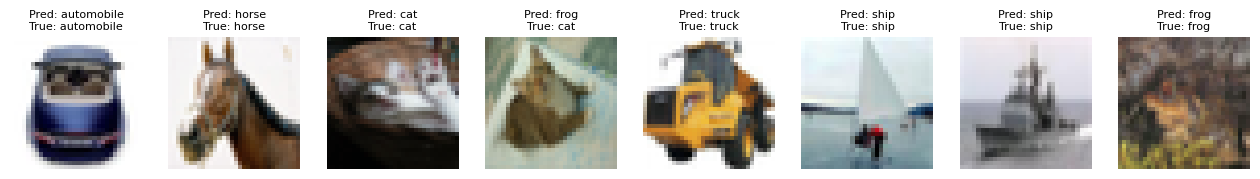

In [23]:
show_predictions(model, testset, n=8)


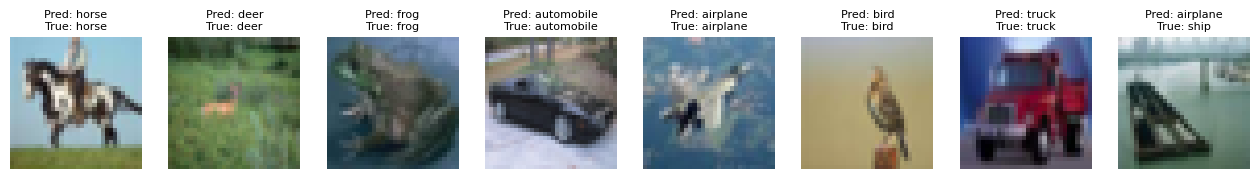

In [24]:
show_predictions(model, testset, n=8)

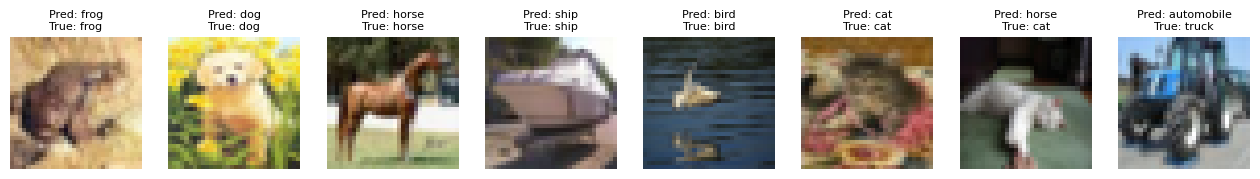

In [25]:
show_predictions(model, testset, n=8)